In [3]:
import pandas
import seaborn


/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif


C:\Users\abdelmounim.essabbar\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.117471   2.233208   0.608122  -0.076054   0.035658   0.407048   
1   0.960721  -1.016248  -0.916203  -0.005482  -0.525410  -1.043802   
2   0.083028  -0.554356   1.242114   0.528519  -1.739835   0.068378   
3   1.923411  -0.366046  -0.765221  -0.487899   0.027963   0.548249   
4   0.114707   0.739526   1.059999   0.292095   0.736008  -0.343875   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_42  Feature_43  \
0   0.417982  -1.593590  -0.875650   -1.045592  ...   -0.325800    2.115560   
1  -0.840872  -0.216647  -0.306142    0.299109  ...   -0.181444   -1.099227   
2  -0.097515  -0.484245   0.125737    0.927004  ...    0.530963   -0.456486   
3   0.522191  -0.563255  -0.355689    1.272117  ...   -0.432906    1.126249   
4   0.012234   0.549576   0.271812    0.226721  ...    0.145240    0.397063   

   Feature_44  Feature_45  Feature_46  Feature_47  Feature_48  Feature_49  \
0   -1.446418   -0.43

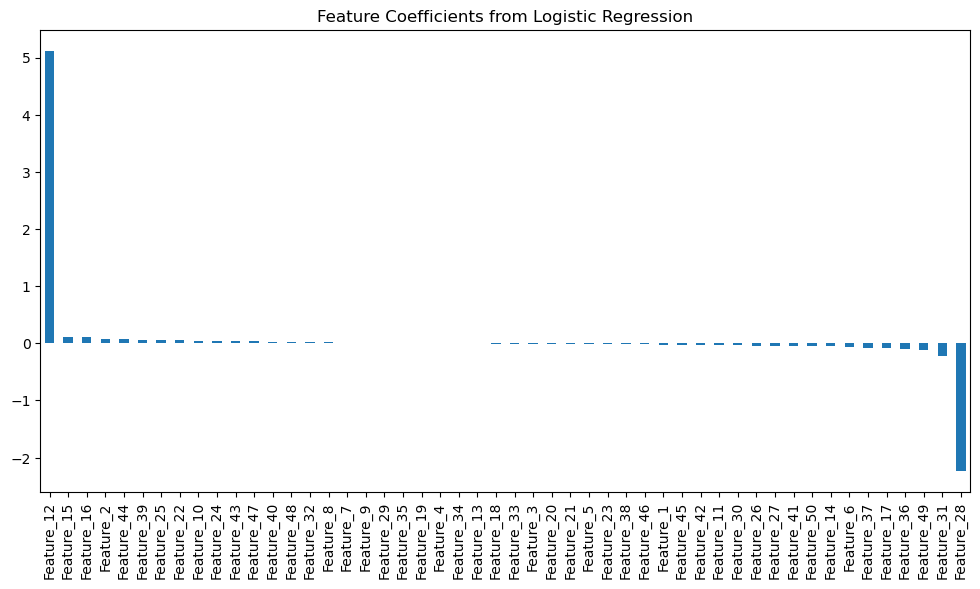

Logistic Regression Accuracy: 0.93
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93      1508
     Class 1       0.95      0.91      0.93      1492

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



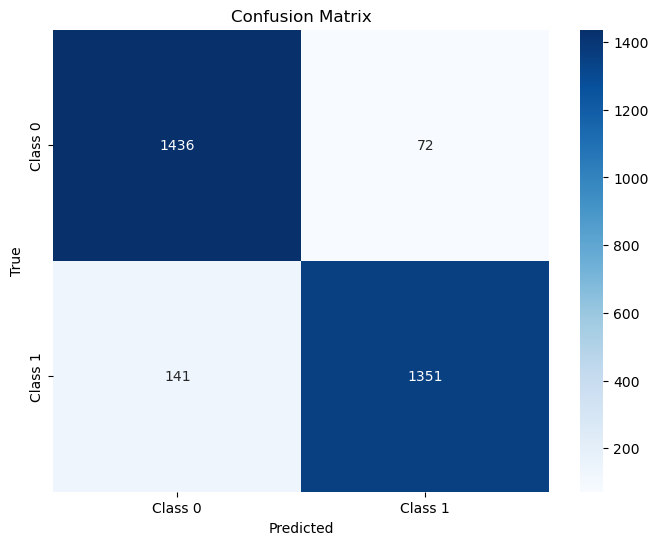

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate a larger synthetic dataset for binary classification
X, y = make_classification(n_samples=10000, n_features=50, n_informative=3, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Convert to DataFrame
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# Convert target variable to categorical
df['Y'] = pd.Categorical.from_codes(y, categories=['Class 0', 'Class 1'])

# Display the first few rows of the dataset
print(df.head())

# Summary statistics for numeric features
print(df.describe())

# Prepare the data for logistic regression
X_numeric = df[feature_names]
y_categorical = df['Y'].cat.codes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_categorical, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Get the feature coefficients
coefficients = log_reg.coef_[0]
coefficients_series = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)

# Plot feature coefficients
plt.figure(figsize=(12, 6))
coefficients_series.plot(kind='bar')
plt.title('Feature Coefficients from Logistic Regression')
plt.show()

# Evaluate the model
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
